In [1]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging('info')

import os
import scipy
import numpy as np
import seaborn as sns
from functools import reduce

from auditory_cortex.plotters import tikzplots
from auditory_cortex.analyses import Correlations, STRFCorrelations
from auditory_cortex.plotters.correlation_plotter import RegPlotter
from auditory_cortex.plotters.plotter_utils import PlotterUtils

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline


INFO:Please install tensorboardX: pip install tensorboardX

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


/bin/sh: line 1: sox: command not found
/home/ahmedb/projects/Wav2Letter/deepspeech.pytorch/deepspeech_pytorch/loader/data_loader.py:17: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
  torchaudio.set_audio_backend("sox_io")


In [8]:
import matplotlib.pyplot as plt

def ladder_plot(dict1, dict2, color_dict, left_label="Left", right_label="Right"):
    keys = list(dict1.keys())
    
    fig, ax = plt.subplots(figsize=(6, len(keys) * 0.5))

    for key in keys:
        y_left = dict1[key]
        y_right = dict2.get(key, y_left)  # fallback to y_left if key missing in dict2
        color = color_dict.get(key, "gray")  # fallback to gray if no color provided

        ax.plot([0, 1], [y_left, y_right], color=color, lw=2)
        ax.text(-0.05, y_left, key, va='center', ha='right')
        ax.text(1.05, y_right, key, va='center', ha='left')

    ax.set_xlim(-0.5, 1.5)
    ax.set_xticks([0, 1])
    ax.set_xticklabels([left_label, right_label])
    # ax.set_yticks([])
    ax.set_title("Ladder Plot")
    plt.tight_layout()
    return fig, ax

In [2]:
threshold=0.5
save_tikz = False
lag = 200

INFO:Plotting trained and shuffled distributions for wav2letter_modified
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (300,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.625341616849632, occurs at x_coordinate: 3
INFO:Peak corr (max): 0.9419892283542826, occurs at x_coordinate: 0
INFO:Peak corr (median): 0.4112040252419031, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.863927107223634, occurs at x_coordinate: 0
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.5537863918563086, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.8919744485408868, occurs at x_coordinate: 0
INFO:Plotting trained and shuffled distributions for wav2vec2
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' usi

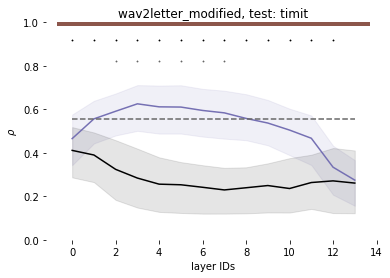

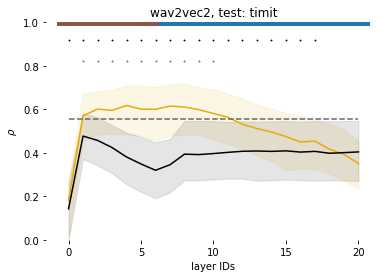

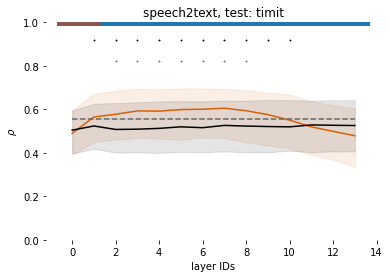

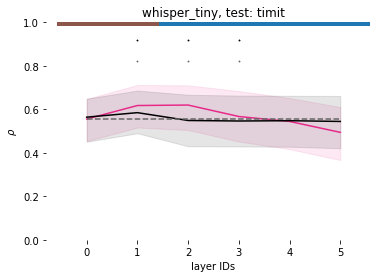

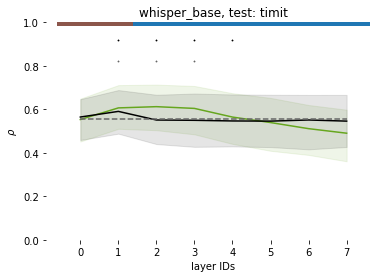

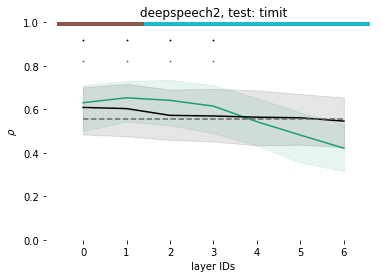

In [5]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
]
bin_width = 50
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		areas = ['core'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)
# model_name = model_names[0]
# plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

INFO:Plotting trained and shuffled distributions for wav2letter_modified
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (104,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.5248858525069486, occurs at x_coordinate: 3
INFO:Peak corr (max): 0.9489861506553868, occurs at x_coordinate: 2
INFO:Peak corr (median): 0.29274344685613796, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.956725002924982, occurs at x_coordinate: 0
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.4707220465295481, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.8449626085876439, occurs at x_coordinate: 0
INFO:Plotting trained and shuffled distributions for wav2vec2
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' u

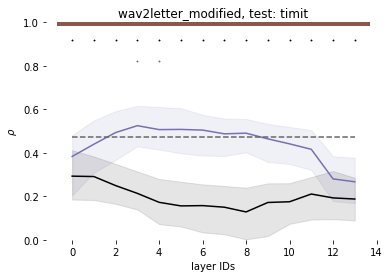

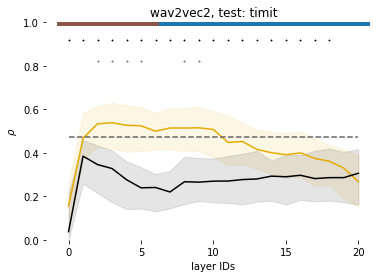

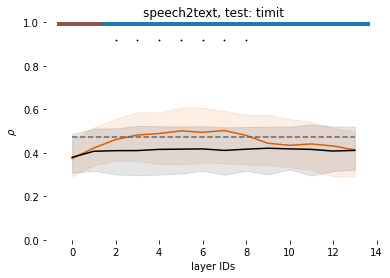

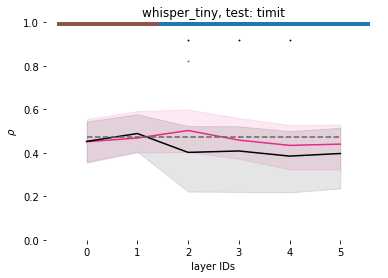

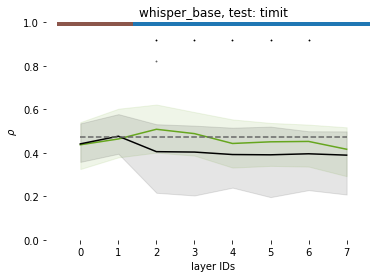

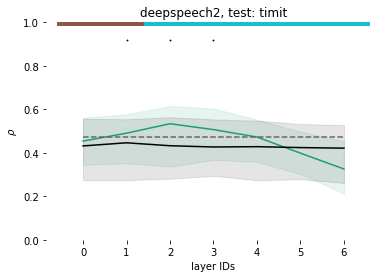

In [6]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
]
bin_width = 50
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifiers = [trained_identifier.replace('ucsf', 'ucsf_reset')]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		areas = ['non-primary'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)
# model_name = model_names[0]
# plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

In [ ]:
mVocs = False
delay = 0
normalized = True
bin_width = 50
lag = 200
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
]
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
# ------------------  get peak medians for all models  ----------------------
areas = ['core', 'non-primary']
area_wise_peak_medians = {area: {} for area in areas}
color_dict = {}
for model_name in model_names:
    corr_obj_trained = Correlations(model_name+'_'+trained_identifier)
    color_dict[model_name] = PlotterUtils.get_model_specific_color(model_name) 
    for area in areas:
        data_dist_trained = corr_obj_trained.get_corr_all_layers_for_bin_width(
                neural_area=area, bin_width=bin_width, delay=delay,
                threshold=threshold, normalized=normalized,mVocs=mVocs,
            )
        layer_medians = [np.median(dist) for dist in data_dist_trained.values()]
        area_wise_peak_medians[area][model_name] = np.max(layer_medians)

INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std 

(<Figure size 432x216 with 1 Axes>,
 <AxesSubplot:title={'center':'Ladder Plot'}>)

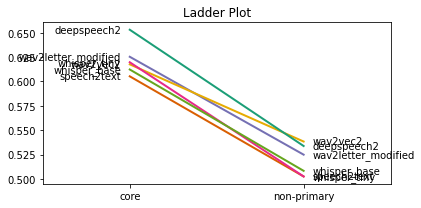

In [10]:
dict1 = area_wise_peak_medians['core']
dict2 = area_wise_peak_medians['non-primary']
ladder_plot(dict1, dict2, color_dict, left_label="core", right_label="non-primary")

### best: deepspeech2, L2 vs STRF

INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...


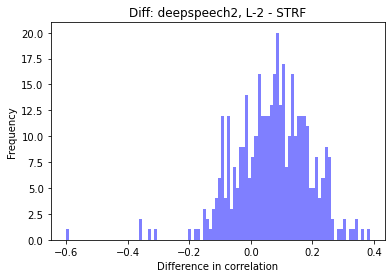

In [28]:

mVocs = False
delay = 0
normalized = True
bin_width = 50
lag = 200
threshold = 0.5
area = 'all'
strf_version = 'coch_'
model_name = 'deepspeech2'
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
corr_obj = Correlations(model_name+'_'+trained_identifier)
data_dist_trained = corr_obj.get_corr_all_layers_for_bin_width(
        neural_area=area, bin_width=bin_width, delay=0,
        threshold=threshold, normalized=True, mVocs=mVocs,
    )

corr_obj = STRFCorrelations('STRF_freqs80_' + strf_version+trained_identifier)
data_dist = corr_obj.get_correlations_for_bin_width(
        neural_area=area, bin_width=bin_width, delay=0,
        threshold=threshold, normalized=True, mVocs=mVocs,
    )
layer = 2
dist1 = data_dist_trained[layer]
dist2 = data_dist

dist_diff = dist1 - dist2
plt.hist(dist_diff, bins=100, alpha=0.5, label='Trained', color='blue')
plt.title(f'Diff: {model_name}, L-{layer} - STRF')
plt.xlabel('Difference in correlation')
plt.ylabel('Frequency')
plt.show()

In [13]:
data_dist.shape

(104,)

In [ ]:
model_names = [
    'whisper_tiny',
    'whisper_base',
    'wav2letter_modified',
    'wav2vec2',
    'speech2text',
    'deepspeech2',
    ]
strf_versions = {
    'wavlet': 'wavlet_',
    'speech2text': 'mel_',
    'deepspeech2': 'mel_ds_',
    'whisper_tiny': 'mel_wh_',
}
lags = [50, 200]

threshold = 0.5
bin_width = 50
area = 'all'
mVocs = True
model_peaks = {lag: {} for lag in lags}
color_dict = {}
for model_name in model_names:
    color_dict[model_name] = PlotterUtils.get_model_specific_color(model_name)
    for lag in lags:
        identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
        corr_obj = Correlations(model_name+'_'+identifier)
        data_dist_trained = corr_obj.get_corr_all_layers_for_bin_width(
                neural_area=area, bin_width=bin_width, delay=0,
                threshold=threshold, normalized=True, mVocs=mVocs,
            )

        layer_medians = [np.median(dist) for dist in data_dist_trained.values()]
        model_peaks[lag][model_name] = np.max(layer_medians)

for strf_version, substr in strf_versions.items():
    col = PlotterUtils.get_model_specific_color(strf_version)
    color_dict[substr] = lighten_color(col, 0.5)
    for lag in lags:
        identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
        corr_obj = STRFCorrelations('STRF_freqs80_'+strf_versions[strf_version]+identifier)
        data_dist = corr_obj.get_correlations_for_bin_width(
                neural_area=area, bin_width=bin_width, delay=0,
                threshold=threshold, normalized=True, mVocs=mVocs,
            )

        # layer_medians = [np.median(dist) for dist in data_dist_trained.values()]
        model_peaks[lag][substr] = np.median(data_dist)

fig, ax = ladder_plot(model_peaks[50], model_peaks[200], color_dict, 
            left_label='trf=100ms', right_label='trf=250ms')
ax.set_title(f"mVocs" if mVocs else "TIMIT")

In [3]:
model_name = 'deepspeech2'
lag = 200
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
corr_obj = Correlations(model_name+'_'+trained_identifier)

In [ ]:
corr_obj